# Exploratory Data Analysis (EDA)

## Objective
Explore the transaction dataset to:
- Understand its structure and key characteristics
- Identify data quality issues (missing values, outliers)
- Discover patterns related to transactions and fraud
- Generate insights to guide feature engineering and modeling


In [1]:
import pandas as pd
from credit_risk_model.core.settings import settings
from credit_risk_model.data.load_data import DataLoader
from credit_risk_model.data.data_cleaning import DataCleaning
from credit_risk_model.viz.plots import (
    plot_numerical_distributions,
    plot_categorical_counts,
    plot_correlation_heatmap,
    plot_outliers,
    plot_daily_transaction_volume,
    plot_transaction_polarity,
    plot_categorical_distributions
    
)

In [2]:
name = "transactions.csv"
raw_path = settings.paths.data["raw_dir"] / name
interim_dir = settings.paths.data["interim_dir"]
print(raw_path)

D:\10Acadamy\Week 4\Task\credit-risk-model\data\raw\transactions.csv


In [3]:
loader = DataLoader(filepath=raw_path, file_type="csv")
raw_df = loader.load()

In [4]:

cleaner = DataCleaning()
df = cleaner.clean(raw_df)
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [5]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [8]:
df["FraudResult"].value_counts(normalize=True) * 100

FraudResult
0    99.798248
1     0.201752
Name: proportion, dtype: float64

In [9]:
df.isnull().sum().sort_values(ascending=False)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

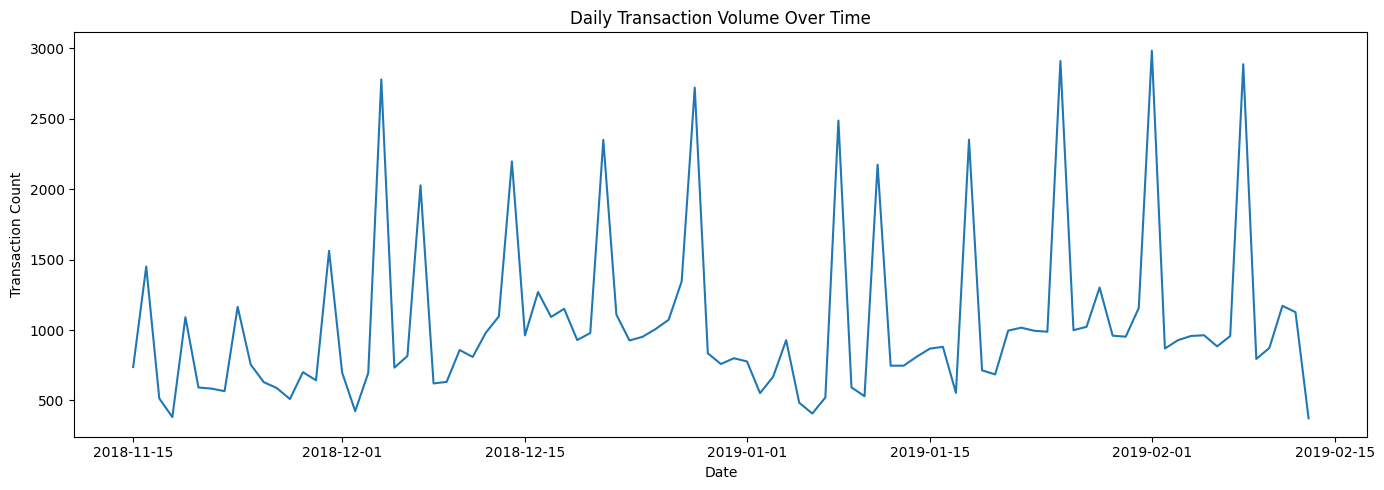

In [10]:
plot_daily_transaction_volume(df)

Total Transactions: 95662
Transactions (Amount > 0 / Debit): 57473 (60.08%)
Transactions (Amount < 0 / Credit): 38189 (39.92%)
Transactions (Amount = 0): 0 (0.00%)


d:\10Acadamy\Week 4\Task\credit-risk-model\.venv\Lib\site-packages\credit_risk_model\viz\plots.py:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


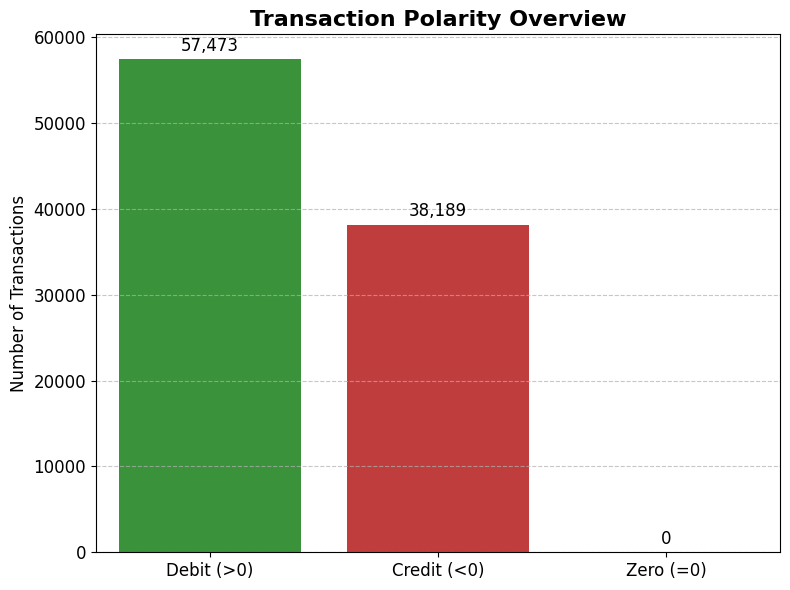

In [11]:
plot_transaction_polarity(df)

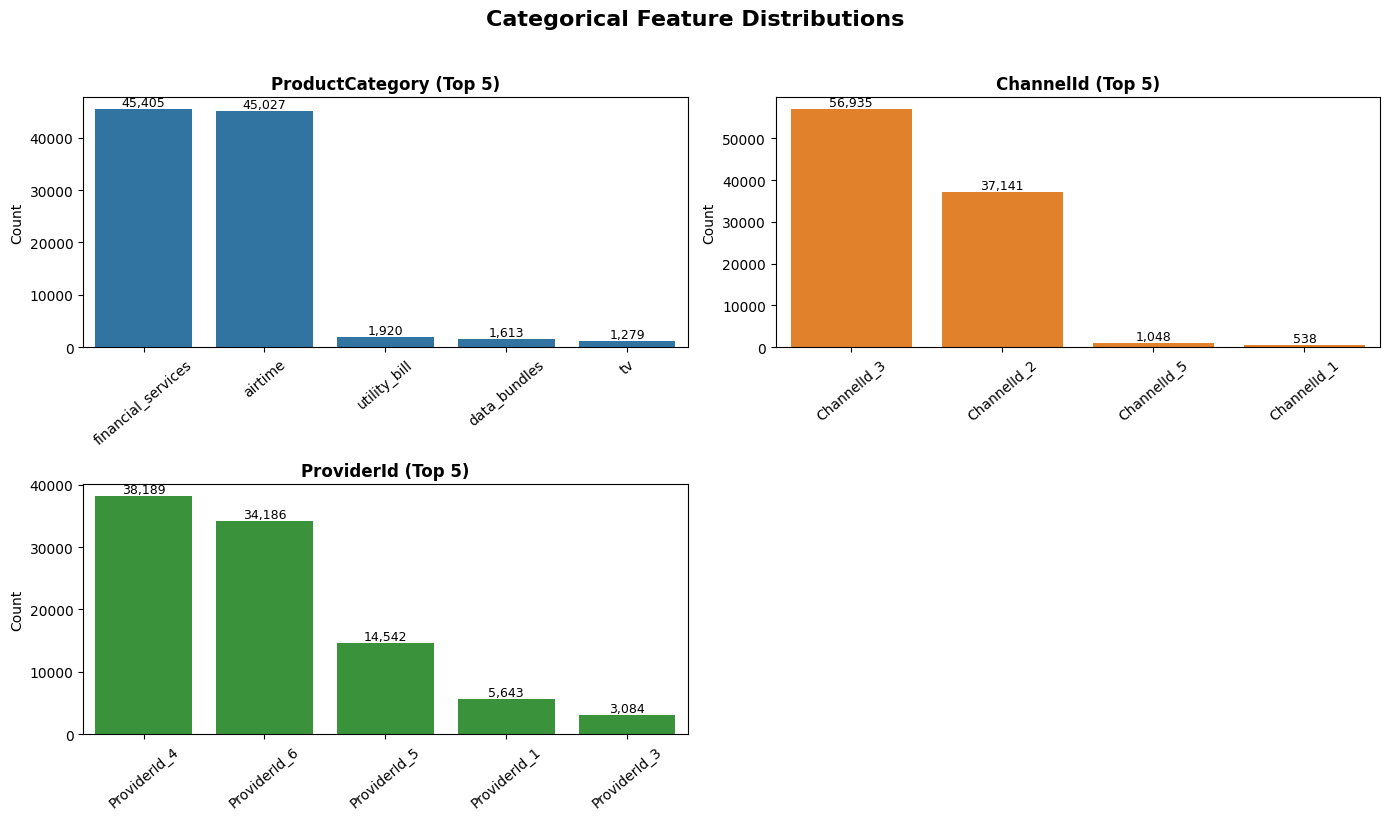

In [19]:
numerical_cols = ["Amount", "Value", "PricingStrategy", "FraudResult"]
categorical_cols = ["ProductCategory", "ChannelId", "ProviderId"]
plot_categorical_distributions(
    df,
    categorical_cols=categorical_cols,
    top_n=5,
    ncols=2
)

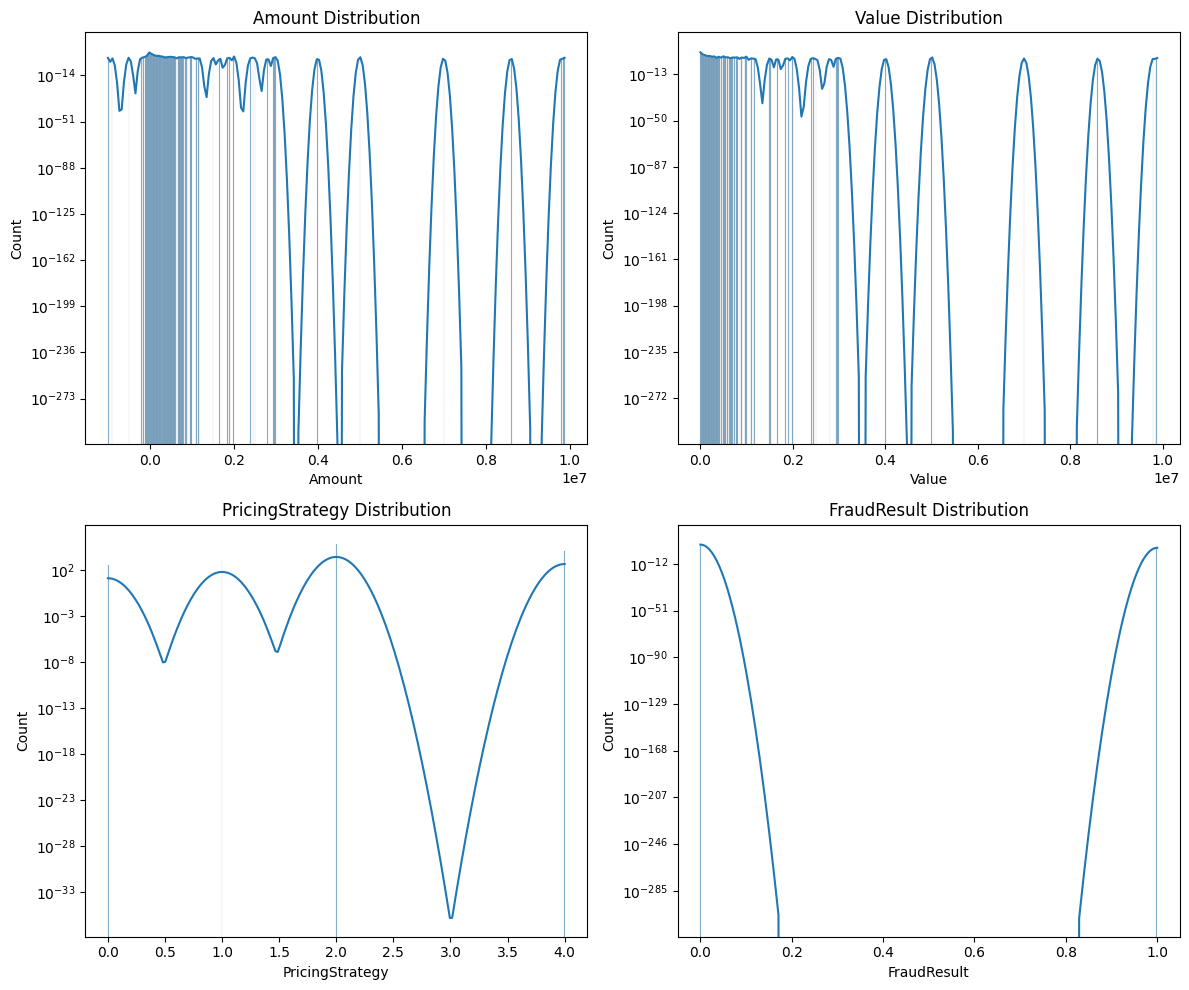

In [13]:
# grid layout (2 columns per row)
plot_numerical_distributions(df, numerical_cols, ncols=2)

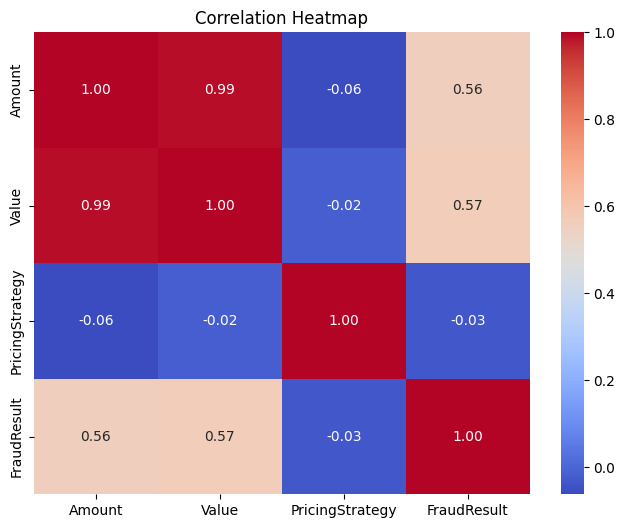

In [14]:
plot_correlation_heatmap(df, numerical_cols)

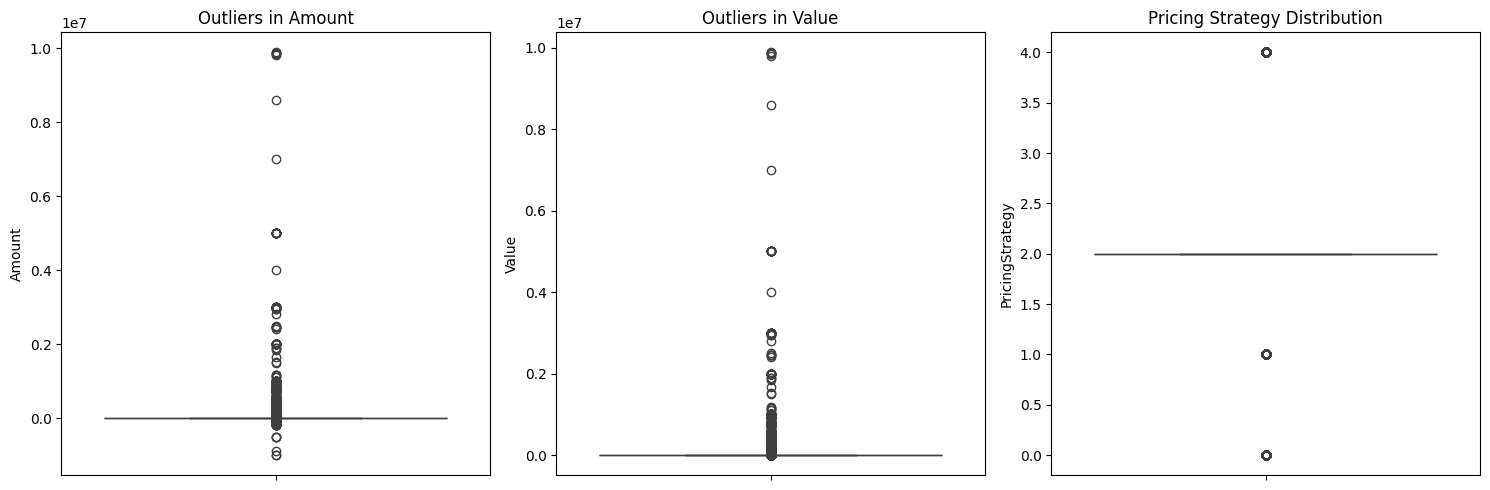

In [15]:
plot_outliers(
    df=df,
    columns=["Amount", "Value", "PricingStrategy"],
    titles=[
        "Outliers in Amount",
        "Outliers in Value",
        "Pricing Strategy Distribution",
    ],
)

## Key Insights from EDA

1. **Fraud cases are extremely rare**, confirming a highly imbalanced classification problem.
2. **Transaction Amount and Value are heavily skewed** with extreme outliers, which may represent fraudulent or unusual behavior.
3. **Most transactions occur through a few dominant channels and product categories**, indicating strong usage patterns.
4. **Correlation with fraud is weak for individual numeric features**, suggesting that fraud detection requires feature interactions and non-linear models.
5. **No significant missing values** were observed, simplifying preprocessing.


### Outliers in Amount
#### Interpretation
- The distribution is heavily right-skewed
- Extreme values dominate the scale
- These are not data errors in a financial system
 - Very large debits or unusual refunds are high-risk events and strong fraud indicators.

### Outliers in Value
#### Interpretation
- Strong long-tail distribution
- Confirms the presence of high-value anomalies
#### Fraud insight
- Large Value transactions deserve extra scrutiny, especially when combined with unusual timing or channels.

### Outliers PricingStrategy Distribution
#### Interpretation
- Outliers here are rare categories, not extreme values
- Box plot is less meaningful for this variable

#### Modeling insight

- PricingStrategy should be treated as categorical, not scaled or transformed.

- Box plots show strong outliers in Amount and Value, indicating a highly skewed
transaction distribution with rare but extreme values. These outliers likely
represent large payments or refunds and are important signals for fraud
detection rather than noise. PricingStrategy shows limited variability and
behaves as a categorical feature.


#  Summary of Key EDA Insights (Guiding Feature Engineering)

Based on the descriptive statistics, visualizations, and data quality checks performed, the following 5 insights are the most critical takeaways and will guide the development of the feature engineering pipeline (Task 3) and target variable creation (Task 4).

---

### 1. Temporal Consistency and RFM Snapshot Date

* **Finding:** The entire dataset spans a defined period from **2018-11-15** to **2019-02-13**.
* **Implication for Modeling:** To accurately calculate the **Recency (R)** component of the RFM analysis (Task 4), a consistent **snapshot date** must be defined. We will use the day immediately following the last transaction date, **2019-02-14**, as our cutoff date. This ensures Recency accurately reflects customer disengagement up to the analysis point.

### 2. Extreme Skewness and Outliers in Transaction Value

* **Finding:** The distributions of `Amount` and `Value` are highly right-skewed, characterized by a large number of small transactions and a long tail of extreme outliers, as confirmed by the histograms and box plots.
* **Implication for Modeling:** Standard distance-based algorithms (like K-Means clustering in Task 4) and linear models (like Logistic Regression) are highly sensitive to skewness and outliers. We must apply a **Log Transformation** or similar robust scaling (e.g., `RobustScaler`) to these numerical features to meet model assumptions and mitigate the disproportionate influence of extreme values.


### 3. Categorical Dominance and Encoding Strategy

* **Finding:** The majority of transactions are concentrated in a small subset of the unique values within categorical features, specifically `ProductCategory` and `ChannelId`. Many categories have very low transaction counts.
* **Implication for Modeling:** Directly using standard **One-Hot Encoding** on all categories would result in an excessive number of sparse features and potential noise. We will group low-frequency categories into an 'Other' bin before encoding. For the highly predictive categories, **Weight of Evidence (WoE)** transformation (Task 3) will be the preferred method due to its monotonic relationship with the log-odds of the target, which is ideal for Logistic Regression.

### 4. Transaction Polarity and Behavioral Distinction

* **Finding:** The `Amount` field contains both positive values (customer debits/purchases) and negative values (customer credits/returns/deposits).
* **Implication for Modeling:** Calculating a simple `SUM(Amount)` (net value) per customer would mask crucial behavioral information. The Feature Engineering step (Task 3) must treat these polarities separately by creating distinct features, such as:
    * `Total_Debit_Amount`
    * `Total_Credit_Count`
    This provides a finer-grained view of the customer's interaction profile.

### 5. Initial High Data Quality in Core Columns

* **Finding:** The critical columns required for customer-level aggregation and RFM calculation (`AccountId`, `Amount`, `TransactionStartTime`) exhibit near-zero or zero missing values.
* **Implication for Modeling:** This simplifies the data preparation process significantly, as no complex imputation strategy is required for the core features. Future effort can be concentrated on creating and validating the derived features, rather than extensive cleaning of the raw data.